# Esercitazione 11

## Esercizio 1

Definisco la funzione lineare da predire. Il rumore stocastico viene introdotto tramite $\sigma$; chiaramente all'aumentare di tale parametro il fit con i dati peggiora. Lo imposto a 0.8, così da fornire sufficiente rumore ai dati senza tuttavia deviare eccessivamente dalla retta. 

Aumentare numero di dati di training migliora il fit del modello. Imposto $N_{train} = 1000$ e $N_{valid} = 100$, così da migliorare il fit senza aumentare eccessivamente i tempi di computazione.

In [114]:
import numpy as np

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.8 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures 
y_valid = np.random.normal(m * x_valid + b, sigma)

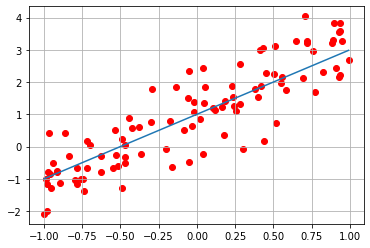

In [115]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

Creo ora la rete neurale. Imposto come ottimizzatore una stocasthic gradient descent, come loss function il mean squared error. Avendo due soli parametri da calcolare, risulta sufficiente un neurone.

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,))) #1 neuron
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Eseguo il fit del modello partendo dai dati di training. Aumentando il numero di epoche aumenta la precisione raggiunta, ma anche il tempo di computazione (che però in un esempio così semplice risulta comunque molto basso). Imposto $N_{epochs} = 30$, poichè oltre tale valore il modello non risulta migliorare ulteriormente, la loss function cessa di diminuire significativamente.

In [117]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 0s 6ms/step - loss: 5.0332 - mse: 5.0332 - val_loss: 4.1818 - val_mse: 4.1818
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 3.1423 - mse: 3.1423 - val_loss: 2.8798 - val_mse: 2.8798
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 2.2331 - mse: 2.2331 - val_loss: 2.0821 - val_mse: 2.0821
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 1.6495 - mse: 1.6495 - val_loss: 1.5715 - val_mse: 1.5715
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 1.2921 - mse: 1.2921 - val_loss: 1.2286 - val_mse: 1.2286
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 1.0976 - mse: 1.0976 - val_loss: 1.0070 - val_mse: 1.0070
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.8282 - mse: 0.8282 - val_loss: 0.8569 - val_mse: 0.8569
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 0.7613 - mse: 0.76

Testo i parametri ottenuti dal modello con il set di validazione.

In [118]:
model.get_weights()
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print("Peformance dei dati di validazione:")
print('Test loss: %.2f' %score[0])
print('Test accuracy: %.2f' %score[1])

4/4 [==============================] - 0s 1ms/step - loss: 0.5266 - mse: 0.5266
Peformance dei dati di validazione:
Test loss: 0.53
Test accuracy: 0.53


Valuto ora la performance del modello rispetto alla curva esatta della funzione.

In [119]:
# exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print("Performance rispetto a curva esatta:")
print('Test loss: %.5f' % score[0])
print('Test accuracy: %.5f' % score[1])

4/4 [==============================] - 0s 2ms/step - loss: 3.0730e-05 - mse: 3.0730e-05
Performance rispetto a curva esatta:
Test loss: 0.00003
Test accuracy: 0.00003


Confronto la loss function per i set di training e di validazione.

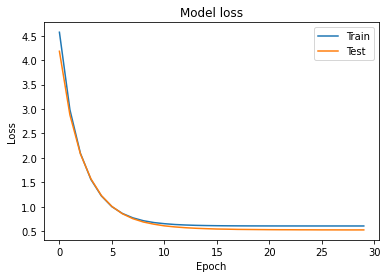

In [120]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

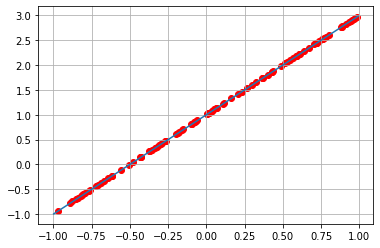

In [121]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Le previsioni del modello risultano essere in ottimo accordo con la funzione esatta.